In [1]:
import warnings
warnings.filterwarnings('ignore')

# Lec - 1

## Organising Data

Information can come in many forms, and part of a data scientist's job is making sure that information is organized in a way that's conducive to analysis. 

One common way to organize information is in a **table**, which is a group of **cells** organized into **rows** and **columns**:

When working with this sort of **tabular data**, it's important to organize row and columns following the principles of "**[tidy data](https://en.wikipedia.org/wiki/Tidy_data)**." What does that mean in the case of our dataset?

1. Each row corresponds to a single house in our dataset. We'll call each of these houses an **observation**.
2. Each column corresponds to a characteristic of each house. We'll call these **features**.
3. Each cell contains only one **value**. 

### Python Lists
---

* Ordered collection of items that can be of any data type, including strings, integers, floats, and other lists.
* Defined by square brackets `[]`.
* Indexing starts at 0.
* Can be sliced, concatenated, and modified.

In [2]:
# Example

my_list = [1, 2, 3, 4, 5]
print(my_list[0])  # prints 1
my_list.append(6)
print(my_list)  # prints [1, 2, 3, 4, 5, 6]

1
[1, 2, 3, 4, 5, 6]


### Python Dictionaries
---

* Unordered collection of key-value pairs.
* Defined by curly brackets {}.
* Keys must be unique and immutable (e.g., strings, integers).
* Values can be of any data type.
* Can be accessed, modified, and iterated over.

In [3]:
my_dict = {'name': 'John', 'age': 30}
print(my_dict['name'])  # prints John
my_dict['city'] = 'New York'
print(my_dict)  # prints {'name': 'John', 'age': 30, 'city': 'New York'}

John
{'name': 'John', 'age': 30, 'city': 'New York'}


### Pandas DataFrame
---
* A 2-dimensional labeled data structure with columns of potentially different types.
* Can be thought of as a spreadsheet or a table in a relational database.
* Can be created from a dictionary, where each key becomes a column and each value becomes a row.

In [4]:
import pandas as pd

In [5]:
# Example
data = {
    'price_approx_usd': [115910.26, 48718.17, 28977.56, 36932.27, 83903.51],
    'surface_covered_in_m2': [128.0, 210.0, 58.0, 79.0, 111.0],
    'rooms': [4.0, 3.0, 2.0, 3.0, 3.0],
    'price_per_m2': [905.55, 231.99, 499.61, 467.50, 755.89]
}

df = pd.DataFrame(data)
df

,price_approx_usd,surface_covered_in_m2,rooms,price_per_m2
0,115910.26,128.0,4.0,905.55
1,48718.17,210.0,3.0,231.99
2,28977.56,58.0,2.0,499.61
3,36932.27,79.0,3.0,467.50
4,83903.51,111.0,3.0,755.89


# Lec - 2 

## Importing and Reading Data

In [6]:
import os

In [7]:
# Get list of datasets and paths
datasets = os.listdir(os.listdir('./')[1])
datasets.pop(0)
datapath = [os.path.join(os.listdir('./')[1],i) for i in datasets]


In [8]:
# Load datasets
DFs = [pd.read_csv(i,header=[0]) for i in datapath]

In [9]:
# Print object type and shape for DataFrames
for no,df in enumerate(DFs):
    print(f"df{no+1} info:", df.info())
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  700 non-null    object 
 1   state          700 non-null    object 
 2   lat            583 non-null    float64
 3   lon            583 non-null    float64
 4   area_m2        700 non-null    int64  
 5   price_usd      700 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 32.9+ KB
df1 info: None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  700 non-null    object 
 1   state          700 non-null    object 
 2   lat            571 non-null    float64
 3   lon            571 non-null    float64
 4   area_m2        700 non-null    int64  
 5   price_mxn      700 non-null    int64  
dtypes: f

## Data Cleaning & Wrangling

In [10]:
for df in DFs:
    df.dropna(inplace=True) # remove NaN
    df['property_type']= df['property_type'].astype('category')

In [11]:
DFs[0]["price_usd"] = ( DFs[0]["price_usd"].str.replace("$","")
                       .str.replace(",","").astype(float))

In [12]:
DFs[0]

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
5,house,Yucatán,21.052583,-89.538639,205,105191.37
...,...,...,...,...,...,...
693,house,Puebla,19.051815,-98.277669,198,115910.26
694,apartment,Distrito Federal,19.309208,-99.171906,70,77572.89
696,house,Yucatán,21.050653,-89.558841,334,137017.34
697,house,Yucatán,21.343796,-89.262060,130,110404.35


In [13]:
pesos2usd = lambda x: round(x/19,2)
DFs[1]["price_usd"] = DFs[1]["price_mxn"].apply(pesos2usd)
DFs[1].drop(columns="price_mxn",inplace=True)

In [14]:
DFs[1]

,property_type,state,lat,lon,area_m2,price_usd
0,apartment,Nuevo León,25.721081,-100.345581,72,68421.05
2,house,Morelos,23.634501,-102.552788,360,278947.37
6,apartment,Estado de México,19.272040,-99.572013,85,65789.47
7,house,San Luis Potosí,22.138882,-100.996510,158,111578.95
8,apartment,Distrito Federal,19.394558,-99.129707,65,39904.74
...,...,...,...,...,...,...
695,house,Morelos,18.917542,-98.963181,140,76315.79
696,house,Distrito Federal,19.472128,-99.146697,190,102263.16
697,house,Estado de México,19.234984,-99.558175,115,110526.32
698,house,Puebla,18.918714,-98.426639,90,46842.11


In [15]:
DFs[2]['state'] = DFs[2].iloc[:,1].str.split("|",expand=True)[2]
DFs[2]["lat lon".split()] = DFs[2].iloc[:,2].str.split(",",expand=True)
DFs[2] = DFs[2][['property_type', 'state', 'lat', 'lon','area_m2','price_usd']]

In [16]:
DFs[2]

,property_type,state,lat,lon,area_m2,price_usd
0,apartment,Distrito Federal,19.52589,-99.151703,71,48550.59
1,house,Estado de México,19.2640539,-99.5727534,233,168636.73
2,house,Estado de México,19.268629,-99.671722,300,86932.69
4,apartment,Veracruz de Ignacio de la Llave,19.511938,-96.871956,84,68508.67
5,house,Jalisco,20.689157,-103.366728,175,102763.00
...,...,...,...,...,...,...
695,house,Jalisco,20.532264,-103.484418,175,121178.91
696,house,Morelos,18.9289862,-99.1802147,100,47417.83
697,house,Yucatán,21.0284038368,-89.6530058049,81,39524.23
698,house,San Luis Potosí,22.11830417,-101.0321938992,360,245050.24


In [17]:
pd.concat(DFs).to_csv(f"{os.listdir('./')[1]}/cleaned-data.csv",index=False)

In [18]:
df = pd.read_csv(f"{os.listdir('./')[1]}/cleaned-data.csv")
df = df.astype({"property_type":"category","state":"category"})
df = df.round({"lat":2,"lon":2})
df.index+=1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 1 to 1736
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   property_type  1736 non-null   category
 1   state          1736 non-null   category
 2   lat            1736 non-null   float64 
 3   lon            1736 non-null   float64 
 4   area_m2        1736 non-null   int64   
 5   price_usd      1736 non-null   float64 
dtypes: category(2), float64(3), int64(1)
memory usage: 59.2 KB


In [19]:
df

,property_type,state,lat,lon,area_m2,price_usd
1,house,Estado de México,19.56,-99.23,150,67965.56
2,house,Nuevo León,25.69,-100.20,186,63223.78
3,apartment,Guerrero,16.77,-99.76,82,84298.37
4,apartment,Guerrero,16.83,-99.91,150,94308.80
5,house,Yucatán,21.05,-89.54,205,105191.37
...,...,...,...,...,...,...
1732,house,Jalisco,20.53,-103.48,175,121178.91
1733,house,Morelos,18.93,-99.18,100,47417.83
1734,house,Yucatán,21.03,-89.65,81,39524.23
1735,house,San Luis Potosí,22.12,-101.03,360,245050.24


# Lec - 3

## Exploratory Data Analysis

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

In [21]:
fig = px.scatter_mapbox(df, 
                  lat="lat", 
                  lon="lon", 
                  center={"lat": 19.43, "lon": -99.13},
                  width=800,
                  height=600,
                  color="property_type", 
                  hover_data=["price_usd"])

fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [22]:
# Plotting a density mapbox
fig = px.density_mapbox(df, 
                         lat="lat", 
                         lon="lon", 
                         hover_data=["price_usd"],
                         zoom=3, 
                         height=600,
                         width=600)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [23]:
# Calculate value counts
value_counts = df['state'].value_counts().head(10)

# Show the plot
fig = px.scatter(x=value_counts.index, 
                 y=value_counts.values, 
                 size=value_counts.values, 
                 color=value_counts.index,  
                 title='Bubble Plot of State Counts',
                 labels={'x': 'State', 'y': 'Count'})

fig.update_layout(legend_title='States')
fig.show()

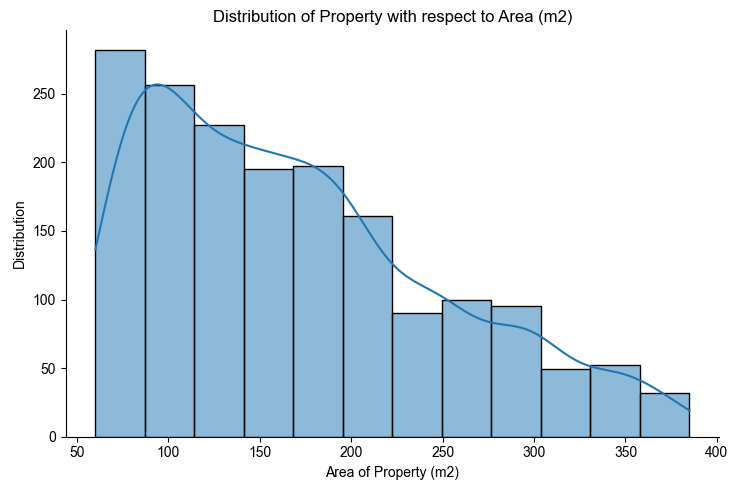

In [24]:
# Plotting a histogram as well density curve for area

sns.displot(data=df, 
            x="area_m2", 
            kde=True,
            bins=12,
            height=5,
            aspect=1.5)


# Add title and labels
plt.title('Distribution of Property with respect to Area (m2)')
plt.xlabel('Area of Property (m2)')
plt.ylabel('Distribution')

# Beautify the graph
sns.set_style('whitegrid')
plt.tight_layout()
plt.show();

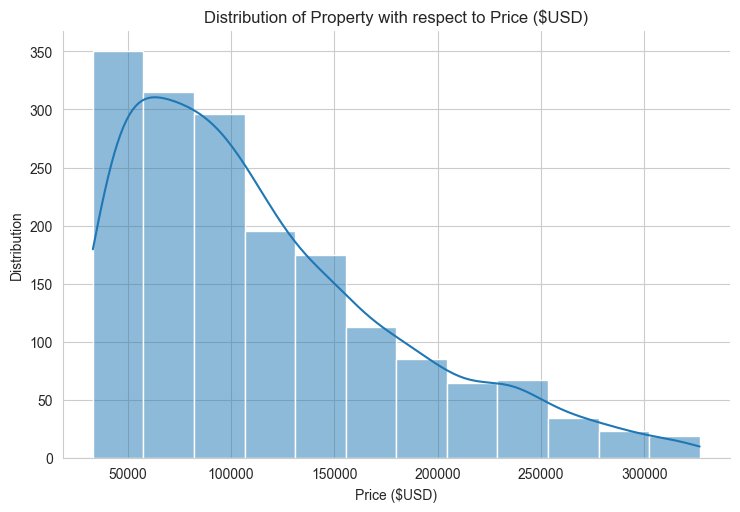

In [25]:
# Plotting a histogram as well density curve for area

sns.displot(data=df, 
            x="price_usd", 
            kde=True,
            bins=12,
            height=5,
            aspect=1.5)


# Add title and labels
plt.title('Distribution of Property with respect to Price ($USD)')
plt.xlabel('Price ($USD)')
plt.ylabel('Distribution');

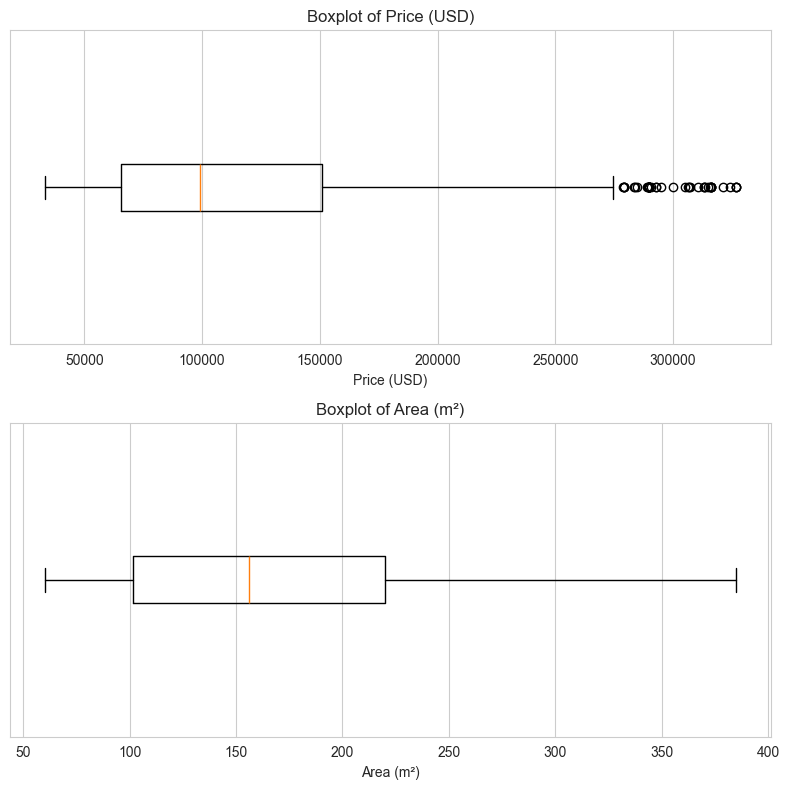

In [26]:
# Create a figure with 2 rows and 1 column of subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

# Plot boxplot for 'price_usd' on the first subplot (top)
axs[0].boxplot(df['price_usd'], vert=False)
axs[0].set_title('Boxplot of Price (USD)')
axs[0].set_xlabel('Price (USD)')
axs[0].set_yticks([])

# Plot boxplot for 'area_m2' on the second subplot (bottom)
axs[1].boxplot(df['area_m2'], vert=False)
axs[1].set_title('Boxplot of Area (m²)')
axs[1].set_xlabel('Area (m²)')
axs[1].set_yticks([])

# Show the plot
plt.tight_layout()
plt.show()

# Lec - 4

## Correlation Analysis

**Which state has the most expensive real estate market?**

Do housing prices vary by state? If so, which are the most expensive states for purchasing a home? 

In [27]:
# Calculate the top 15 states with highest average house price
topstates = (df.groupby('state')['price_usd']
                    .mean().round(2)
                    .sort_values(ascending=False)
                    .head(15)
                    .reset_index())

# Create the bar chart using Plotly Express
fig = px.bar(topstates,
             x='state',
             y='price_usd',
             title='Top 10 States with Highest Average House Price',
             labels={ 'price_usd': 'Price ($USD)'},
             text='price_usd',
             color='state')

# Update layout for better appearance
fig.update_layout(xaxis_title='States', 
                  yaxis_title='Price ($USD)',
                  legend_title='States',
                  xaxis=dict(tickmode='array', ticktext=[], tickvals=[]))

fig.show()

In [33]:
# Calculate the top 10 states with highest average house price per m2
topstates = ((df['price_usd']/df['area_m2']).groupby(df['state'])
                    .mean().round(2)
                    .sort_values(ascending=False)
                    .head(10)
                    .reset_index())

topstates.columns = ['state', 'Avg Price per m2 ($usd)']
# Create the bar chart using Plotly Express
fig = px.bar(topstates,
             x='state',
             y='Avg Price per m2 ($usd)',
             title='Top 10 states with highest average house price per m2',
             labels={ 'Avg Price per m2 ($usd)': 'Avg Price per m2 ($usd)'},
             text='Avg Price per m2 ($usd)',
             color='state')

# Update layout for better appearance
fig.update_layout(xaxis_title='States', 
                  yaxis_title='Avg Price per m2 ($usd)',
                  legend_title='States',
                  xaxis=dict(tickmode='array', ticktext=[], tickvals=[]))

fig.show()